# Data Import

In [2]:
import pandas as pd

In [3]:
transactions = pd.read_excel("data/transactions.xlsx")

In [4]:
transactions

,trans_id,account_id,type,operation,amount,balance,k_symbol,bank,account,date
0,232961,793,credit,other bank collection,3401.0,4201.0,NaN,IJ,6149286,1993-01-05
1,1049882,3592,credit,other bank collection,6007.0,6607.0,pension,MN,73166322,1993-01-10
2,1548750,5270,credit,other bank collection,44749.0,45549.0,NaN,IJ,80269753,1993-01-14
3,110536,374,credit,other bank collection,23041.0,23441.0,NaN,WX,4004806,1993-02-05
4,529774,1806,credit,other bank collection,5029.0,5429.0,pension,UV,39912659,1993-02-05
...,...,...,...,...,...,...,...,...,...,...
72037,533712,1817,withdrawal,ccard withdrawal,900.0,59764.9,NaN,NaN,0,1998-12-30
72038,361311,1227,withdrawal,ccard withdrawal,800.0,23521.8,NaN,NaN,0,1998-12-30
72039,507730,1734,withdrawal,ccard withdrawal,2600.0,71427.9,NaN,NaN,0,1998-12-30
72040,586816,1998,withdrawal,ccard withdrawal,2700.0,77376.6,NaN,NaN,0,1998-12-30


In [5]:
transactions.head()

,trans_id,account_id,type,operation,amount,balance,k_symbol,bank,account,date
0,232961,793,credit,other bank collection,3401.0,4201.0,NaN,IJ,6149286,1993-01-05
1,1049882,3592,credit,other bank collection,6007.0,6607.0,pension,MN,73166322,1993-01-10
2,1548750,5270,credit,other bank collection,44749.0,45549.0,NaN,IJ,80269753,1993-01-14
3,110536,374,credit,other bank collection,23041.0,23441.0,NaN,WX,4004806,1993-02-05
4,529774,1806,credit,other bank collection,5029.0,5429.0,pension,UV,39912659,1993-02-05


In [6]:
transactions.shape

(72042, 10)

# Data Wrangling

In [7]:
transactions["amount"]

0         3401.0
1         6007.0
2        44749.0
3        23041.0
4         5029.0
          ...   
72037      900.0
72038      800.0
72039     2600.0
72040     2700.0
72041     3700.0
Name: amount, Length: 72042, dtype: float64

In [8]:
transactions["amount"].mean()

5509.344668387872

In [9]:
transactions["amount"].describe()

count    72042.000000
mean      5509.344668
std       8516.949273
min          2.000000
25%       1700.000000
50%       3282.000000
75%       5893.000000
max      74770.000000
Name: amount, dtype: float64

In [10]:
transactions["date"]

0       1993-01-05
1       1993-01-10
2       1993-01-14
3       1993-02-05
4       1993-02-05
           ...    
72037   1998-12-30
72038   1998-12-30
72039   1998-12-30
72040   1998-12-30
72041   1998-12-30
Name: date, Length: 72042, dtype: datetime64[ns]

In [12]:
transactions["date"].dt.month

0         1
1         1
2         1
3         2
4         2
         ..
72037    12
72038    12
72039    12
72040    12
72041    12
Name: date, Length: 72042, dtype: int64

In [13]:
transactions["year"] = transactions["date"].dt.year
transactions.head()

,trans_id,account_id,type,operation,amount,balance,k_symbol,bank,account,date,year,month
0,232961,793,credit,other bank collection,3401.0,4201.0,NaN,IJ,6149286,1993-01-05,1993,1
1,1049882,3592,credit,other bank collection,6007.0,6607.0,pension,MN,73166322,1993-01-10,1993,1
2,1548750,5270,credit,other bank collection,44749.0,45549.0,NaN,IJ,80269753,1993-01-14,1993,1
3,110536,374,credit,other bank collection,23041.0,23441.0,NaN,WX,4004806,1993-02-05,1993,2
4,529774,1806,credit,other bank collection,5029.0,5429.0,pension,UV,39912659,1993-02-05,1993,2


# Data Visualisation

In [16]:
import seaborn as sns

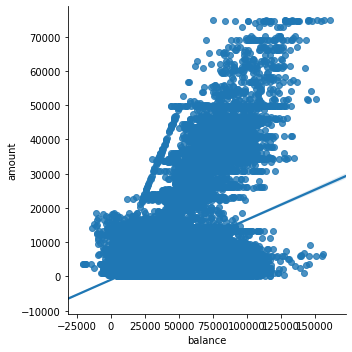

In [17]:
sns.lmplot(x = "balance", y = "amount", data = transactions)

In [19]:
bank_IJ = transactions.query("bank == 'IJ'")
bank_IJ.head()

,trans_id,account_id,type,operation,amount,balance,k_symbol,bank,account,date,year,month
0,232961,793,credit,other bank collection,3401.0,4201.0,NaN,IJ,6149286,1993-01-05,1993,1
2,1548750,5270,credit,other bank collection,44749.0,45549.0,NaN,IJ,80269753,1993-01-14,1993,1
5,232962,793,credit,other bank collection,3401.0,7617.2,NaN,IJ,6149286,1993-02-05,1993,2
13,1548751,5270,credit,other bank collection,44749.0,80808.2,NaN,IJ,80269753,1993-02-14,1993,2
16,232963,793,credit,other bank collection,3401.0,11035.7,NaN,IJ,6149286,1993-03-05,1993,3


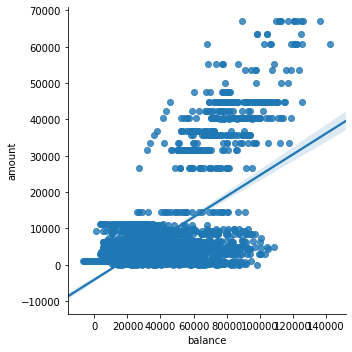

In [20]:
sns.lmplot(x = "balance", y = "amount", data = bank_IJ)

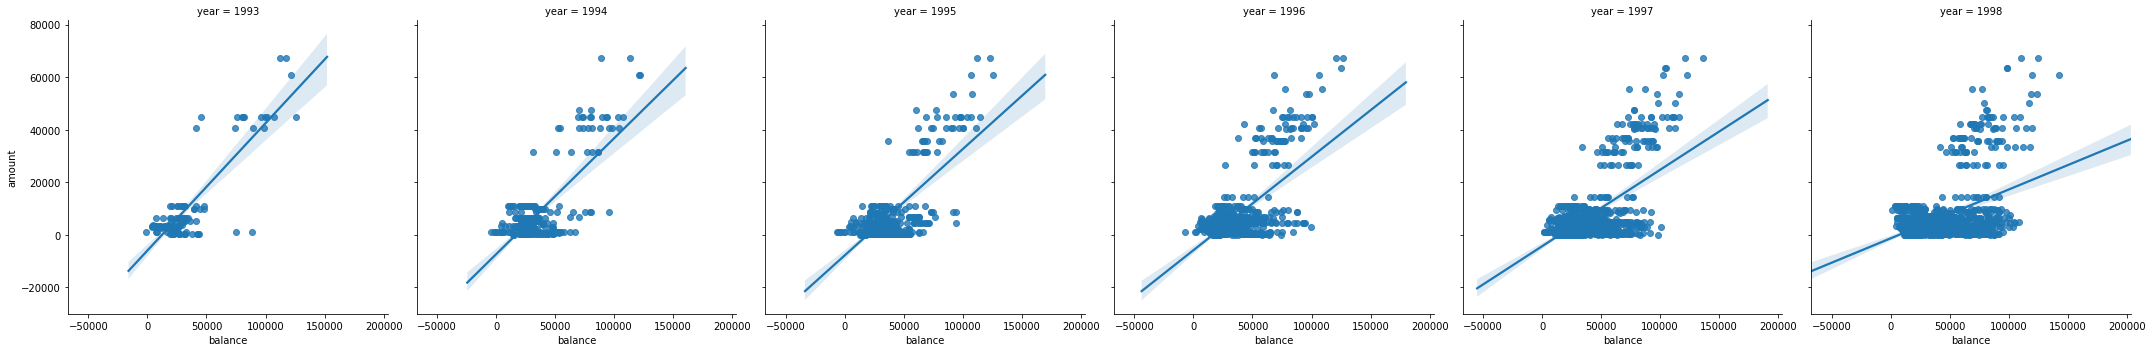

In [21]:
sns.lmplot(x = "balance", y = "amount", data = bank_IJ, col = "year")

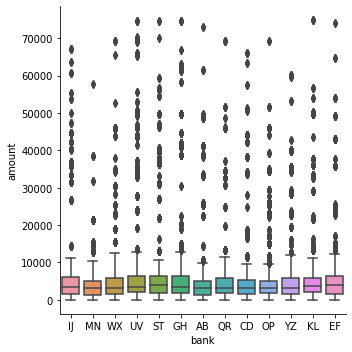

In [22]:
sns.catplot(x = "bank", y = "amount", data = transactions, kind = "box")

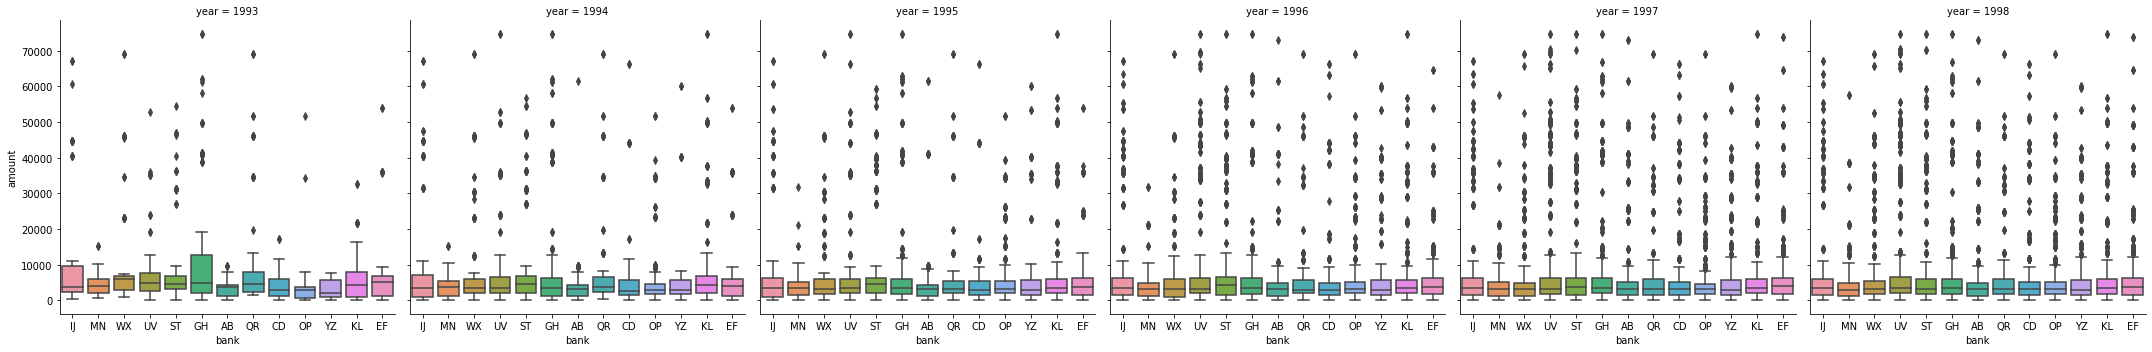

In [23]:
sns.catplot(x = "bank", y = "amount", data = transactions, kind = "box", col = "year")

# Statistics and Machine Learning

In [30]:
import pandas as pd
import seaborn as sns

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
our_model = LinearRegression()

In [34]:
our_model.fit(transactions[["balance"]], transactions[["amount"]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
our_model.coef_

array([[0.17552742]])

In [41]:
our_model.intercept_

array([-983.92011798])

In [43]:
amount_pred = our_model.predict(transactions[["balance"]])

In [44]:
amount_pred

array([[ -246.52942312],
       [  175.78955136],
       [ 7011.17837285],
       ...,
       [11553.63494345],
       [12597.79491167],
       [18082.65820464]])

In [45]:
r2_score(transactions[["amount"]], amount_pred)

0.19952416004210805

In [46]:
mean_squared_error(transactions[["amount"]], amount_pred)

58064450.62056621

In [47]:
transactions_no_na = transactions.dropna(subset=["bank"])

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(transactions_no_na[["balance", "amount", "year"]],
                                                   transactions_no_na[["bank"]])

In [50]:
x_train.shape

(50099, 3)

In [51]:
y_test.head()

,bank
49180,UV
15557,OP
46591,YZ
12542,GH
22002,YZ


In [52]:
y_test.shape

(16700, 1)

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
model = DecisionTreeClassifier()

In [57]:
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [58]:
y_pred = model.predict(x_train)

In [59]:
accuracy_score(y_train, y_pred)

1.0

In [60]:
accuracy_score(y_test, model.predict(x_test))

0.9574850299401197